In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("creditcard.csv")


In [1]:
pip install notebook


Note: you may need to restart the kernel to use updated packages.


Data Summary:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.33227

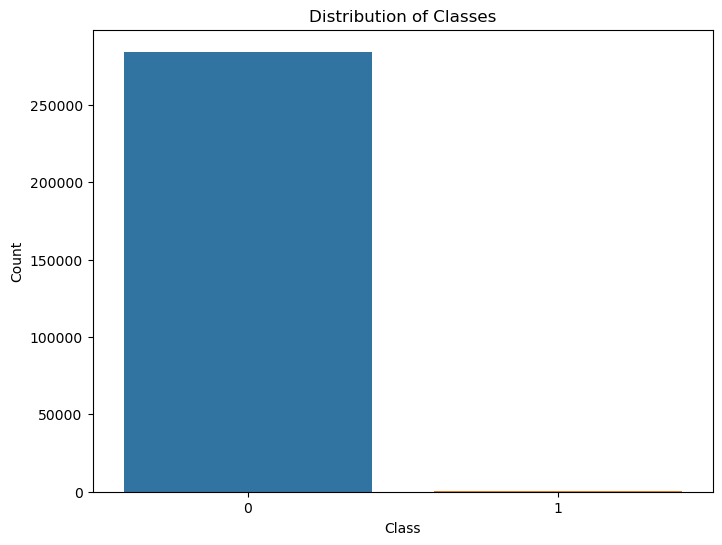

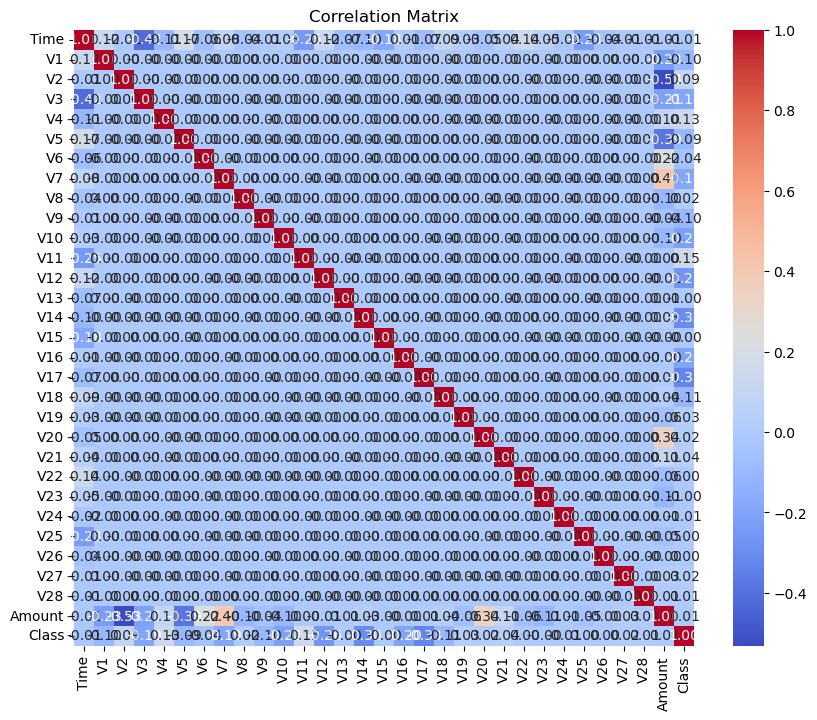

ValueError: num must be an integer with 1 <= num <= 28, not 29

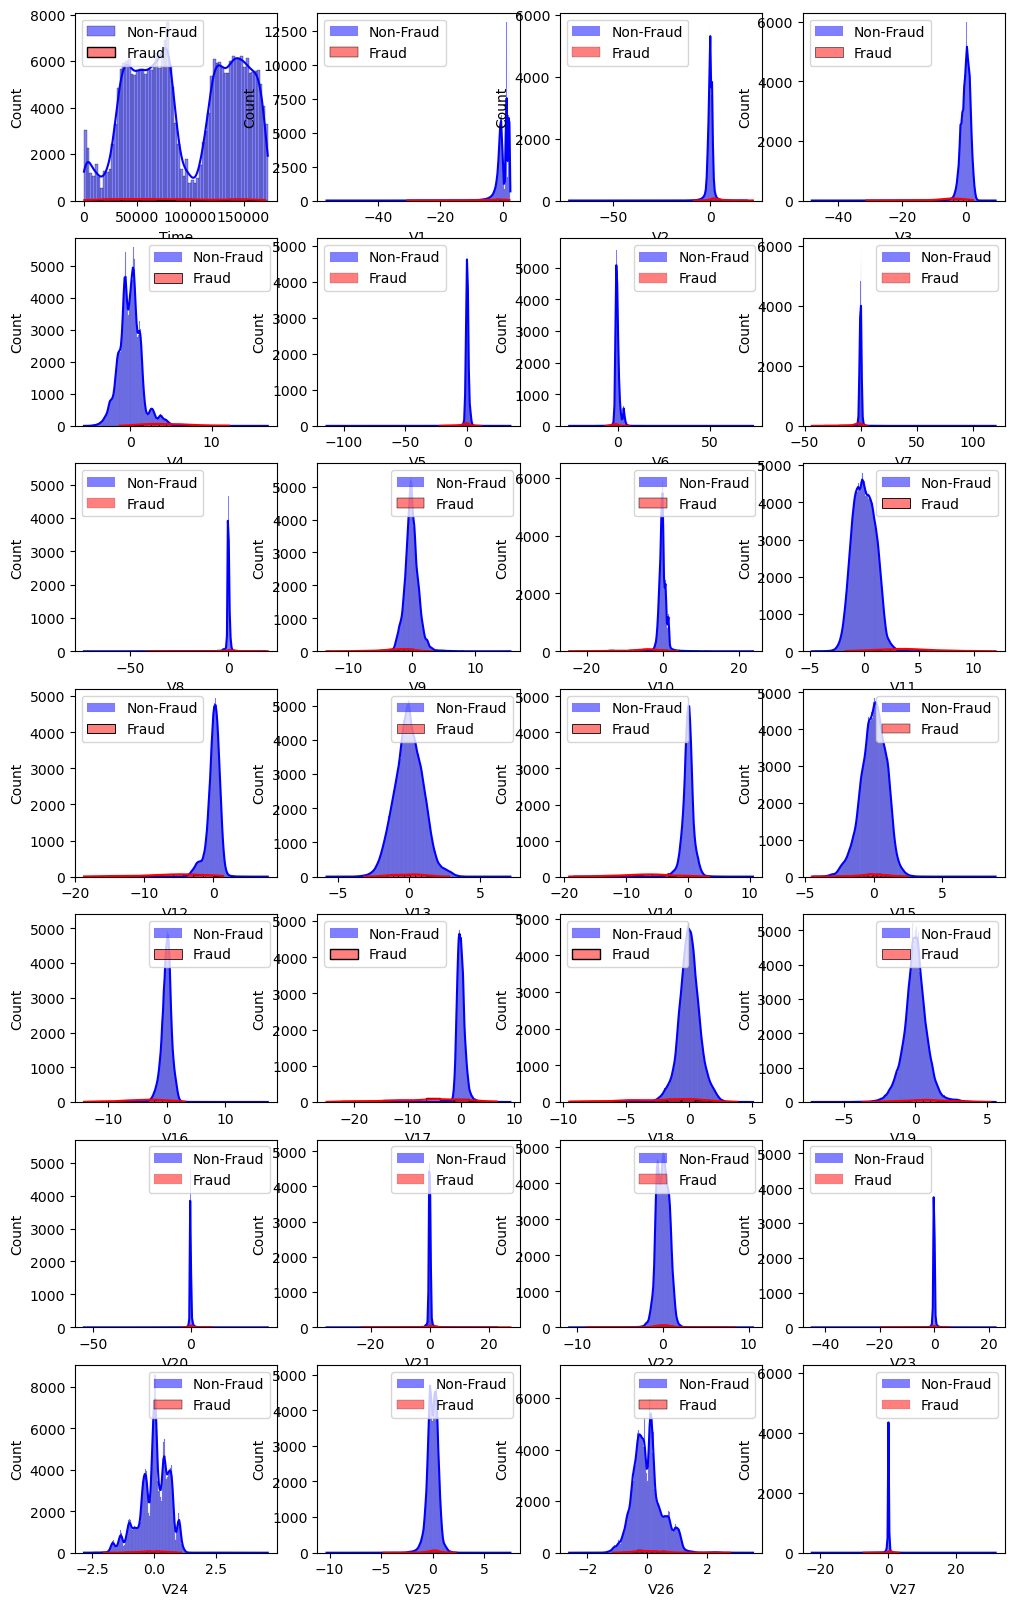

In [6]:
# Exploratory Data Analysis (EDA)
# Show data summary
print("Data Summary:")
print(data.describe())

# Visualize the distribution of classes (fraudulent vs. non-fraudulent transactions)
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualize the distribution of features for fraud and non-fraud transactions
features = data.drop('Class', axis=1).columns
plt.figure(figsize=(12, 20))
for i, feature in enumerate(features,1):
    plt.subplot(7, 4, i)
    sns.histplot(data[data['Class'] == 0][feature], color='blue', kde=True, label='Non-Fraud')
    sns.histplot(data[data['Class'] == 1][feature], color='red', kde=True, label='Fraud')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend()
plt.tight_layout()
plt.show()


In [7]:
# Show data summary
print(data.info())

# Check for missing values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

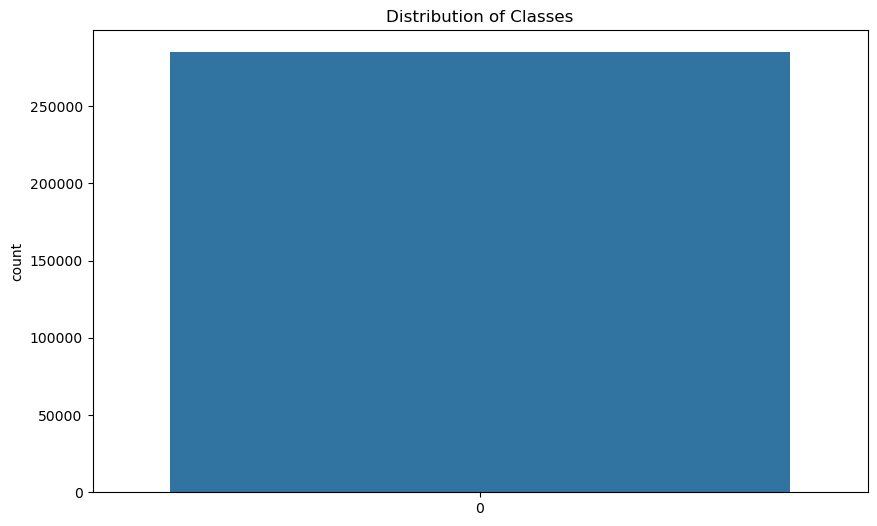

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data['Class'])
plt.title('Distribution of Classes')
plt.show()


In [8]:
# Handle missing values if any
if data.isnull().sum().any():
    # If there are missing values, you can choose to handle them based on your data and domain knowledge
    # Here, we'll impute missing values with the mean for numerical features and mode for categorical features
    
    # Separate numerical and categorical features
    numeric_features = data.select_dtypes(include=[np.number]).columns
    categorical_features = data.select_dtypes(include=[np.object]).columns

    # Impute missing values for numerical features
    data[numeric_features] = data[numeric_features].fillna(data[numeric_features].mean())

    # Impute missing values for categorical features
    data[categorical_features] = data[categorical_features].fillna(data[categorical_features].mode().iloc[0])

    print("Missing values handled successfully.")
else:
    print("No missing values found.")


No missing values found.


In [9]:
# Remove outliers if needed
from scipy import stats

def remove_outliers(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    outlier_indices = np.where(z_scores > threshold)
    cleaned_data = data[(z_scores < threshold).all(axis=1)]
    return cleaned_data

cleaned_data = remove_outliers(data.drop('Class', axis=1))  # Remove outliers for numerical features
print("Outliers removed and date data type corrected if applicable.")


Outliers removed and date data type corrected if applicable.


In [10]:
# Balancing the data
frauds = data[data['Class'] == 1]
non_frauds = data[data['Class'] == 0]
print("Frauds:", len(frauds))
print("Non-Frauds:", len(non_frauds))

# Oversampling the minority class
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(data.drop('Class', axis=1), data['Class'])
balanced_data = pd.concat([pd.DataFrame(X_balanced), pd.DataFrame(y_balanced, columns=['Class'])], axis=1)


Frauds: 492
Non-Frauds: 284315


In [12]:
# Step 5: Feature Engineering

# 1. Time Feature Engineering
# Convert the 'Time' feature (which represents the seconds elapsed between each transaction and the first transaction in the dataset) into more meaningful features such as hour, day, etc.
data['Hour'] = data['Time'] // 3600  # Convert seconds to hours

# 2. Amount Scaling
# Scale the 'Amount' feature to have similar magnitude as other features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Amount_Scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# 3. Remove unnecessary features
# Since we created new features from 'Time' and scaled 'Amount', we can drop these columns and keep only the engineered features
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# 4. Other Feature Engineering Ideas
# Depending on the dataset and domain knowledge, you can try other feature engineering techniques such as polynomial features, interaction features, etc.


In [13]:
# Step 6: Model Selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 7: Model Training
# Split data into features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Step 8: Model Validation
# Predict on test set
y_pred = model.predict(X_test)



In [14]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Step 9: Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


In [ ]:
# Save the model
import joblib
joblib.dump(model, 'credit_card_fraud_detection_model.pkl')

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the trained model
model = joblib.load('credit_card_fraud_detection_model.pkl')

# Define a route for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    data = request.json  # assuming JSON input
    
    # Perform any necessary preprocessing on the input data
    
    # Make predictions
    predictions = model.predict(data)
    
    # Return predictions as JSON response
    return jsonify(predictions.tolist())

if __name__ == '__main__':
    app.run(debug=True)
